In [2]:
# Data Exploration
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pickle
import pickle

# Classification models
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn import neighbors

from sklearn.neural_network import MLPClassifier

# Onehotencoding
from sklearn.preprocessing import OneHotEncoder

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# train_test_split
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import classification_report, f1_score, precision_score, confusion_matrix, recall_score

In [3]:
data = pd.read_csv("data/diabetes_clean.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,Female,80,No,Yes,never,25.19,6.6,140,0
1,Female,54,No,No,no info,27.32,6.6,80,0
2,Male,28,No,No,never,27.32,5.7,158,0
3,Female,36,No,No,current,23.45,5.0,155,0
4,Male,76,Yes,Yes,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80,No,No,no info,27.32,6.2,90,0
99996,Female,2,No,No,no info,17.37,6.5,100,0
99997,Male,66,No,No,former,27.83,5.7,155,0
99998,Female,24,No,No,never,35.42,4.0,100,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  object 
 3   heart_disease        100000 non-null  object 
 4   smoking_history      100000 non-null  object 
 5   bmi_score            100000 non-null  float64
 6   haemoglobin_level    100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   is_diabetic          100000 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [5]:
data.hypertension = data.hypertension.astype(np.object)
data.heart_disease = data.heart_disease.astype(np.object)

/var/folders/yl/blp7v0ys1lzdfkls51wcv3l40000gn/T/ipykernel_80652/1157998497.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.hypertension = data.hypertension.astype(np.object)
/var/folders/yl/blp7v0ys1lzdfkls51wcv3l40000gn/T/ipykernel_80652/1157998497.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.heart_disease = data.heart_disease.astype(np.object)


# creating features and target

In [6]:
y = data.is_diabetic
X = data.drop(["is_diabetic"], axis = 1)

# train - test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
display(X_train.shape)
display(X_test.shape)

display(y_train.shape)
display(y_test.shape)

(80000, 8)

(20000, 8)

(80000,)

(20000,)

# Spliting numericals and categoricals

In [9]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [10]:
X_train_num.head()

,age,bmi_score,haemoglobin_level,blood_glucose_level
75220,73,24.77,3.5,80
48955,80,24.60,5.7,145
44966,38,24.33,4.0,158
13568,26,18.87,5.0,100
92727,61,22.11,4.5,85


In [11]:
X_train_cat.head()

,gender,hypertension,heart_disease,smoking_history
75220,Male,No,No,former
48955,Male,No,No,never
44966,Female,No,No,current
13568,Female,No,No,former
92727,Female,Yes,No,current


In [12]:
X_test_num.head()

,age,bmi_score,haemoglobin_level,blood_glucose_level
75721,13,20.82,5.8,126
80184,3,21.00,5.0,145
19864,63,25.32,3.5,200
76699,2,17.43,6.1,126
92991,33,40.08,6.2,200


In [13]:
X_test_cat.head()

,gender,hypertension,heart_disease,smoking_history
75721,Female,No,No,no info
80184,Female,No,No,no info
19864,Male,No,No,former
76699,Female,No,No,never
92991,Female,No,No,former


# Encoding

In [14]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_encoded = pd.DataFrame(encoded_cat, columns=cols)
X_train_encoded

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
79995,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79996,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79997,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79998,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
encoded_test_cat = encoder.transform(X_test_cat).toarray()
X_test_encoded = pd.DataFrame(encoded_test_cat, columns=cols)
X_test_encoded

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19996,1.0,0.0,1.0,0.0,1.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19998,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# Scaling

In [16]:
transformer = MinMaxScaler().fit(X_train_num) # we will reuse this transformer for X_test later
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_train_scaled

,age,bmi_score,haemoglobin_level,blood_glucose_level
0,0.9125,0.180418,0.000000,0.000000
1,1.0000,0.178340,0.400000,0.295455
2,0.4750,0.175040,0.090909,0.354545
3,0.3250,0.108300,0.272727,0.090909
4,0.7625,0.147904,0.181818,0.022727
...,...,...,...,...
79995,0.6125,0.280773,0.400000,0.000000
79996,0.1875,0.221122,0.272727,0.359091
79997,0.5250,0.197164,0.418182,0.022727
79998,0.4625,0.182740,0.490909,0.354545


In [17]:
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled

,age,bmi_score,haemoglobin_level,blood_glucose_level
0,0.1625,0.132135,0.418182,0.209091
1,0.0375,0.134336,0.272727,0.295455
2,0.7875,0.187141,0.000000,0.545455
3,0.0250,0.090698,0.472727,0.209091
4,0.4125,0.367559,0.490909,0.545455
...,...,...,...,...
19995,0.5500,0.145948,0.454545,0.359091
19996,0.7625,0.390784,0.000000,0.045455
19997,0.6125,0.201687,0.236364,0.090909
19998,0.9125,0.211588,0.563636,0.090909


# Concatenating encoded and scaled columns

In [18]:
X_train_processed = pd.concat([X_train_encoded, X_train_scaled], axis = 1)
X_test_processed = pd.concat([X_test_encoded, X_test_scaled], axis = 1)

In [19]:
X_train_processed

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info,age,bmi_score,haemoglobin_level,blood_glucose_level
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.9125,0.180418,0.000000,0.000000
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0000,0.178340,0.400000,0.295455
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4750,0.175040,0.090909,0.354545
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.3250,0.108300,0.272727,0.090909
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.7625,0.147904,0.181818,0.022727
...,...,...,...,...,...,...,...,...,...,...,...
79995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6125,0.280773,0.400000,0.000000
79996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.1875,0.221122,0.272727,0.359091
79997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5250,0.197164,0.418182,0.022727
79998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4625,0.182740,0.490909,0.354545


In [20]:
X_test_processed

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info,age,bmi_score,haemoglobin_level,blood_glucose_level
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1625,0.132135,0.418182,0.209091
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0375,0.134336,0.272727,0.295455
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.7875,0.187141,0.000000,0.545455
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0250,0.090698,0.472727,0.209091
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.4125,0.367559,0.490909,0.545455
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5500,0.145948,0.454545,0.359091
19996,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.7625,0.390784,0.000000,0.045455
19997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6125,0.201687,0.236364,0.090909
19998,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.9125,0.211588,0.563636,0.090909


# Logistic Regression

In [21]:
LR_model = LogisticRegression()
LR_model.fit(X_train_processed, y_train)

LogisticRegression()

In [22]:
LR_model.score(X_test_processed, y_test)

0.95895

In [23]:
y_test_pred = LR_model.predict(X_test_processed)

In [24]:
array = confusion_matrix(y_test, y_test_pred)

print('             Predicted Labels')
print('             |   0    |     1')
print('---------------------------------')
print('True label 0 | ',array[0][0],'|   ', (array[0][1]))
print('---------------------------------')
print('           1 | ',array[1][0],' |   ', (array[1][1]))

             Predicted Labels
             |   0    |     1
---------------------------------
True label 0 |  18133 |    159
---------------------------------
           1 |  662  |    1046


In [25]:
total = y_test.shape[0]

array = confusion_matrix(y_test, y_test_pred)
print('             Predicted Labels')
print('             |   A    |     B')
print('---------------------------------')
print('True label A | ',round((array[0][0]/total),2),'|   ', (array[0][1])/total)
print('---------------------------------')
print('           B | ',round((array[1][0]/total),2),' |   ', (array[1][1])/total)

             Predicted Labels
             |   A    |     B
---------------------------------
True label A |  0.91 |    0.00795
---------------------------------
           B |  0.03  |    0.0523


Text(0.5, 427.9555555555555, 'Predicted label')

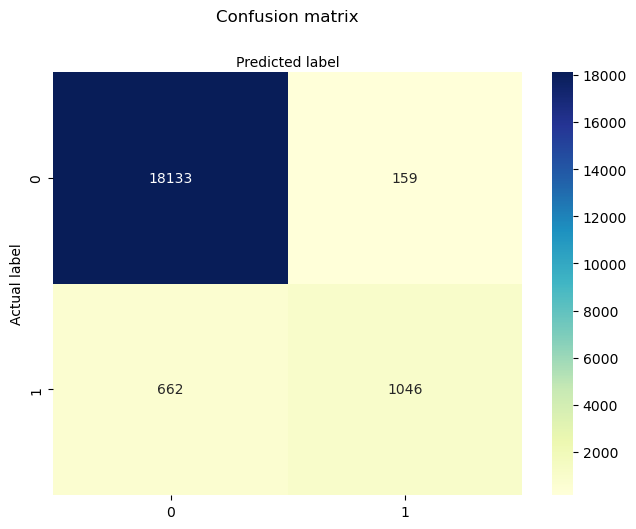

In [26]:
class_names=['without diabetes', 'with diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(array, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [27]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_test_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.96      0.99      0.98     18292
   with diabetes       0.87      0.61      0.72      1708

        accuracy                           0.96     20000
       macro avg       0.92      0.80      0.85     20000
    weighted avg       0.96      0.96      0.96     20000



In [28]:
precision_score(y_test, y_test_pred)

0.8680497925311204

In [29]:
f1_score(y_test, y_test_pred)

0.7181599725369034

In [30]:
recall_score(y_test, y_test_pred)

0.6124121779859485

In [31]:
pickle.dump(LR_model, open('Pickle/LR_model.p', 'wb'))

# Logistic Regression results
score = 0.95, 
precision_score = 0.86, 
f1_score = 0.71,
recall_score = 0.61

# KNN neighbours

In [32]:
KNN_model = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
KNN_model.fit(X_train_processed, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
y_pred_knn = KNN_model.predict(X_test_processed)

In [34]:
KNN_model.score(X_test_processed, y_test)

0.95935

In [35]:
array_KNN = confusion_matrix(y_test, y_pred_knn)

print('             Predicted Labels')
print('             |   0    |     1')
print('---------------------------------')
print('True label 0 | ',array_KNN[0][0],'|   ', (array_KNN[0][1]))
print('---------------------------------')
print('           1 | ',array_KNN[1][0],' |   ', (array_KNN[1][1]))

             Predicted Labels
             |   0    |     1
---------------------------------
True label 0 |  18102 |    190
---------------------------------
           1 |  623  |    1085


In [36]:
total = y_test.shape[0]
print('             Predicted Labels')
print('             |   A    |     B')
print('---------------------------------')
print('True label A | ',round((array_KNN[0][0]/total),2),'|   ', (array_KNN[0][1])/total)
print('---------------------------------')
print('           B | ',round((array_KNN[1][0]/total),2),' |   ', (array_KNN[1][1])/total)

             Predicted Labels
             |   A    |     B
---------------------------------
True label A |  0.91 |    0.0095
---------------------------------
           B |  0.03  |    0.05425


In [37]:
print(precision_score(y_test, y_pred_knn))
f1_score(y_test, y_pred_knn)

0.8509803921568627


0.7274555816292322

In [38]:
recall_score(y_test, y_pred_knn)

0.6352459016393442

In [39]:
pickle.dump(KNN_model, open('Pickle/KNN_model.p', 'wb'))

# KNN results:
model score: 0.95,
precision score: 0.85,
f1_score: 0.72,
recall_score: 0.63

# Decision Tree Classifier

In [40]:
tree_model = DecisionTreeClassifier(max_depth = 2)
tree_model.fit(X_train_processed, y_train)

DecisionTreeClassifier(max_depth=2)

In [41]:
y_pred_tree = tree_model.predict(X_test_processed)

In [42]:
tree_model.score(X_test_processed, y_test)

0.97215

In [43]:
array_tree = confusion_matrix(y_test, y_pred_tree)

print('             Predicted Labels')
print('             |   0    |     1')
print('---------------------------------')
print('True label 0 | ',array_tree[0][0],'|   ', (array_tree[0][1]))
print('---------------------------------')
print('           1 | ',array_tree[1][0],' |   ', (array_tree[1][1]))

             Predicted Labels
             |   0    |     1
---------------------------------
True label 0 |  18292 |    0
---------------------------------
           1 |  557  |    1151


In [44]:
total = y_test.shape[0]
print('             Predicted Labels')
print('             |   A    |     B')
print('---------------------------------')
print('True label A | ',round((array_tree[0][0]/total),2),'|   ', (array_tree[0][1])/total)
print('---------------------------------')
print('           B | ',round((array_tree[1][0]/total),2),' |   ', (array_tree[1][1])/total)

             Predicted Labels
             |   A    |     B
---------------------------------
True label A |  0.91 |    0.0
---------------------------------
           B |  0.03  |    0.05755


In [45]:
# to find the optimum dept, I repeat the process but choose the max_depth of the tree
max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train_processed, y_train)
    test.append(model.score(X_test_processed,y_test))
    train.append(model.score(X_train_processed,y_train))

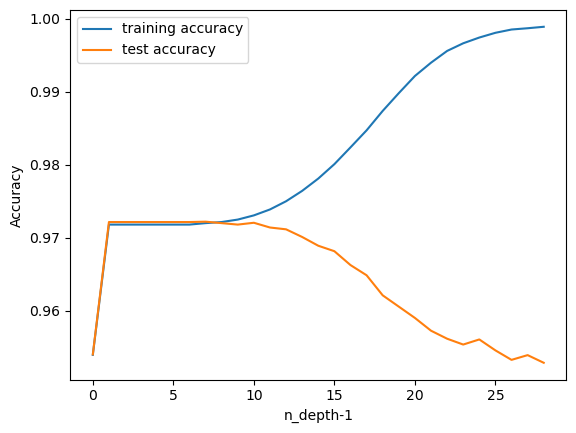

In [46]:
# we quickly see overfitting properties

%matplotlib inline
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth-1")
plt.legend()

Observation: Based on model score from above graph, I can choose max_dept from 2 to 8. After that overfitting of the model takes place.

In [47]:
print(precision_score(y_test, y_pred_tree))
f1_score(y_test, y_pred_tree)

1.0


0.8051766351871283

In [48]:
recall_score(y_test, y_pred_tree)

0.6738875878220141

In [49]:
pickle.dump(tree_model, open('Pickle/DecisionTree_model.p', 'wb'))

# DecisionTreeClassifier results: 
Model score = 0.97, Precision_score = 1.0, f1_score = 0.80, recall_score = 0.67

In [50]:
data.is_diabetic.value_counts()

0    91500
1     8500
Name: is_diabetic, dtype: int64

# MLPClassifier

In [51]:
mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train_processed, y_train)
print(mlp.score(X_test_processed, y_test))

0.97205


In [52]:
y_pred_mlp = mlp.predict(X_test_processed)

In [53]:
array_mlp = confusion_matrix(y_test, y_pred_mlp)
total = y_test.shape[0]

print('             Predicted Labels')
print('             |   A    |     B')
print('---------------------------------')
print('True label A | ',round((array_mlp[0][0]/total),2),'|   ', (array_mlp[0][1])/total)
print('---------------------------------')
print('           B | ',round((array_mlp[1][0]/total),2),' |   ', (array_mlp[1][1])/total)

             Predicted Labels
             |   A    |     B
---------------------------------
True label A |  0.91 |    0.0005
---------------------------------
           B |  0.03  |    0.05795


In [54]:
precision = precision_score(y_test,y_pred_mlp)
recall = recall_score(y_test,y_pred_mlp)
f1score = f1_score(y_test,y_pred_mlp)

print("MLPClassifier precision: ", precision)
print("MLPClassifier recall: ",recall)
print("MLPClassifier f1: ",f1score)

MLPClassifier precision:  0.9914456800684346
MLPClassifier recall:  0.6785714285714286
MLPClassifier f1:  0.8057003823427181


In [55]:
pickle.dump(mlp, open('Pickle/MLP_model.p', 'wb'))

In [56]:
titles = ["ModelName", "Test data score", "F1", "Precision", "Recall"]
models = ["Logistic Regression", "KNN Classifier", "DecisionTreeClassifier", "MLPClassifier"]
test_score = [0.95, 0.95, 0.97, 0.97]
f1 = [0.71, 0.72, 0.80, 0.80]
precision = [0.86, 0.85, 1.0, 0.99]
recall = [0.61, 0.63, 0.67, 0.67]

results = pd.DataFrame(zip(models, test_score, f1, precision, recall),columns = titles)
results

,ModelName,Test data score,F1,Precision,Recall
0,Logistic Regression,0.95,0.71,0.86,0.61
1,KNN Classifier,0.95,0.72,0.85,0.63
2,DecisionTreeClassifier,0.97,0.80,1.00,0.67
3,MLPClassifier,0.97,0.80,0.99,0.67


In [57]:
results.to_csv("results/ML_Results_Before_Sampling.csv", index = False)

Observation: Among all models, DecisionTreeClassifier model has done very well. But this model might be skewed more towards predicting people not having diabetes.

Hence as next step, I will balance data using techniques like oversampling/undersampling/SMOTE.

In [58]:
X_train_processed.to_csv("data/train-test/X_train_processed.csv", index = False)
y_train.to_csv("data/train-test/y_train.csv", index = False)

X_test_processed.to_csv("data/train-test/X_test_processed.csv", index = False)
y_test.to_csv("data/train-test/y_test.csv", index = False)